<a href="https://colab.research.google.com/github/chitreshkr/Databricks/blob/main/Apache_PySpark_by_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Files - Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

#### Text cells

### Access to the shell

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [ ]:
!pip install pyspark==3.4.0

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02_02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [ ]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2023-07-17 02:00:04--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [               <=>  ]   1.72G  3.13MB/s    in 9m 56s  

2023-07-17 02:10:01 (2.96 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1851621098]

total 5424688
-rw-r--r-- 1 root root 1851621098 Jul 16 11:03  reported-crimes.csv
-rw-r--r-- 1 root root 1851621098 Jul 16 11:03 'rows.csv?accessType=DOWNLOAD'
-rw-r--r-- 1 root root 1851621098 Jul 16 11:03 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x 1 root root       4096 Jul 13 13:33  sample_data


In [ ]:
!ls


 reported-crimes.csv		'rows.csv?accessType=DOWNLOAD.1'
'rows.csv?accessType=DOWNLOAD'	 sample_data


In [ ]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 3616460
-rw-r--r-- 1 root root 1851621098 Jul 16 11:03  reported-crimes.csv
-rw-r--r-- 1 root root 1851621098 Jul 16 11:03 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x 1 root root       4096 Jul 13 13:33  sample_data


In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11646166|   JC213529|2018-09-01 00:01:00|082XX S INGLESIDE...|0810|             THEFT|           OVER $500|           RESIDENCE| false|    true|0631|     006|   8|            44|      06|     

## (03_03) Schemas

In [ ]:
!ls

 reported-crimes.csv  'rows.csv?accessType=DOWNLOAD.1'	 sample_data


In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
from pyspark.sql.types import StructType,StructField,StringType,TimestampType,BooleanType,DoubleType,IntegerType

In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
StructType([
    StructField('ID',StringType,True),
    StructField('Case Number',StringType,True),
    StructField('Date',TimestampType,True)

 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location'])

In [ ]:
labels = [
    ('ID',StringType()),
    ('Case Number',StringType()),
    ('Date',TimestampType()),
    ('Block',StringType()),
    ('IUCR',StringType()),
    ('Primary Type',StringType()),
    ('Description',StringType()),
    ('Location Description',StringType()),
    ('Arrest',StringType()),
    ('Domestic',BooleanType()),
    ('Beat',StringType()),
    ('District',StringType()),
    ('Ward',StringType()),
    ('Community Area',StringType()),
     ('FBI Code',StringType()),
    ('X Coordinate',StringType()),
    ('Y Coordinate',StringType()),
    ('Year',IntegerType()),
    ('Updated On',StringType()),
    ('Latitude',DoubleType()),
    ('Longitude',DoubleType()),
    ('Location',StringType())]

In [ ]:
schema = StructType([StructField (x[0],x[1],True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [ ]:
rc = spark.read.csv('reported-crimes.csv',schema=schema)

In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.show(5)

+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|null|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|null|          Updated On|    null|    

## (03_04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [ ]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|IUCR|
|0810|
|1153|
|1562|
|0460|
+----+
only showing top 5 rows



In [ ]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0810|
|1153|
|1562|
|0460|
+----+
only showing top 5 rows



In [ ]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0810|
|1153|
|1562|
|0460|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [ ]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|Case Number|null|Arrest|
|   JC213529|null| false|
|   JC212333|null| false|
|   JB167760|null| false|
+-----------+----+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [ ]:
from pyspark.sql.functions import lit

In [ ]:
rc.withColumn('One',lit(1)).show(5)

+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|null|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|null|          Updated On| 

In [ ]:
rc = rc.drop('IUCR')
rc.show(5)

+--------+-----------+----+--------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|Date|               Block|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+----+--------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|null|               Block|      Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|null|          Updated On|    null|     null|Location|
|116

**Remove the column IUCR**

## (03_05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [ ]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))

In [ ]:
one_day.count()

3

In [ ]:
rc.union(one_day).orderBy('Date',ascending=False).show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00|  003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| fal

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [ ]:
rc.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  46728|
|CRIMINAL SEXUAL A...|   1294|
|            STALKING|   3388|
|PUBLIC PEACE VIOL...|  47785|
|           OBSCENITY|    587|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  11157|
|            GAMBLING|  14422|
|   CRIMINAL TRESPASS| 193372|
|             ASSAULT| 418522|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  14068|
| MOTOR VEHICLE THEFT| 314134|
|               THEFT|1418514|
|             BATTERY|1232280|
|             ROBBERY| 255602|
|            HOMICIDE|   9478|
|           RITUALISM|     23|
|    PUBLIC INDECENCY|    161|
| CRIM SEXUAL ASSAULT|  26459|
+--------------------+-------+
only showing top 20 rows



## (03_06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [ ]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.filter(col('Arrest')=='true').count()/rc.select('Arrest').count()

0.27753770490929774

  **What are the top 3 locations for reported crimes?**

In [ ]:
rc.groupby('Location Description').count().show()

+--------------------+------+
|Location Description| count|
+--------------------+------+
|SCHOOL - PRIVATE ...|    11|
|AIRPORT TERMINAL ...|  1603|
|VEHICLE - COMMERCIAL|     9|
|EXPRESSWAY EMBANK...|     1|
|POLICE FACILITY/V...| 17603|
|RESIDENCE - YARD ...|    78|
|CHA PARKING LOT /...|    12|
|            SIDEWALK|665558|
|AIRPORT TERMINAL ...|    77|
|OTHER RAILROAD PR...|     7|
|CTA GARAGE / OTHE...|  9935|
|            CAR WASH|  2775|
|    AIRPORT/AIRCRAFT| 16114|
|MEDICAL/DENTAL OF...|  7096|
|    FEDERAL BUILDING|   783|
|         CTA STATION|  3912|
|SCHOOL, PUBLIC, G...| 28989|
|SPORTS ARENA/STADIUM|  4996|
|VEHICLE - OTHER R...|   200|
|            CEMETARY|   350|
+--------------------+------+
only showing top 20 rows



In [ ]:
rc.groupby('Location Description').count().orderBy('count',ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770624|
|           RESIDENCE|1146116|
|           APARTMENT| 699154|
+--------------------+-------+
only showing top 3 rows



## (04_01) Built-in functions

In [ ]:
from pyspark.sql import functions

In [ ]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_append', 'array_compact', 'array_contains', 'array_distinct', 'array_except', 'ar

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [ ]:
from pyspark.sql.functions import lower,upper,substring

In [ ]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|              theft|              THEFT|                         THEF|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|        sex offense|        SEX OFFENSE|                         SEX |
|            battery|            BATTERY|                         BATT|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



### Numeric functions


**Show the oldest date and the most recent date**

In [ ]:
from pyspark.sql.functions import min,max

In [ ]:
rc.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [ ]:
from pyspark.sql.functions import date_add,date_sub

In [ ]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`. If `days` is a negative value
    then these amount of days will be deducted from `start`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    start : :class:`~pyspark.sql.Column` or str
        date column to work on.
    days : :class:`~pyspark.sql.Column` or str or int
        how many days after the given date to calculate.
        Accepts negative value as well to calculate backwards in time.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        a date after/before given number of days.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Ro

In [ ]:
rc.select(date_sub(min(col('Date')),3),date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



## (04_02) Working with dates

In [ ]:
from pyspark.sql.functions import to_date,to_timestamp,lit

In [ ]:
help(lit)

Help on function lit in module pyspark.sql.functions:

lit(col: Any) -> pyspark.sql.column.Column
    Creates a :class:`~pyspark.sql.Column` of literal value.
    
    .. versionadded:: 1.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column`, str, int, float, bool or list, NumPy literals or ndarray.
        the value to make it as a PySpark literal. If a column is passed,
        it returns the column as is.
    
        .. versionchanged:: 3.4.0
            Since 3.4.0, it supports the list type.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        the literal instance.
    
    Examples
    --------
    >>> df = spark.range(1)
    >>> df.select(lit(5).alias('height'), df.id).show()
    +------+---+
    |height| id|
    +------+---+
    |     5|  0|
    +------+---+
    
    Create a literal from a list.
    
    >>> spark.range(1).select(lit([1, 2, 3])).show()
    +------------



  **2019-12-25 13:30:00**

In [ ]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [ ]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [ ]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])

In [ ]:
df.show(1,truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [ ]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa'),to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa')).show(1)

SparkUpgradeException: ignored

In [ ]:
nrc = spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11646166|   JC213529|09/01/2018 12:01:...|082XX S INGLESIDE...|0810|             THEFT|           OVER $500|           RESIDENCE| false|    true|0631|     006|   8|            44|      06| 

## (04_03) Joins

**Download police station data**

In [ ]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2023-07-17 02:41:27--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [            <=>     ]   1.72G  3.09MB/s    in 9m 34s  

2023-07-17 02:51:02 (3.08 MB/s) - ‘police-station.csv’ saved [1851621098]



In [ ]:
https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

In [ ]:
ps = spark.read.csv('police-station.csv',header=True)

In [ ]:
ps.show(5)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11646166|   JC213529|09/01/2018 12:01:...|082XX S INGLESIDE...|0810|             THEFT|           OVER $500|           RESIDENCE| false|    true|0631|     006|   8|            44|      06| 

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [ ]:
rc.cache()
rc.count()

6756282

In [ ]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------+
|DISTRICT|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|    null|
|      16|
|     021|
+--------+



In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [ ]:
ps.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 006|
|                 008|
|                 019|
|                 018|
|                 008|
|                 004|
|                 002|
|                 002|
|                 025|
|                 003|
|                 017|
|                 006|
|                 019|
|                 002|
|                 011|
|                 022|
|                 002|
|                 025|
|                 011|
|                 015|
+--------------------+
only showing top 20 rows



In [ ]:
ps = ps.withColumn('Format_District',lpad(col('DISTRICT'),3,'0'))

In [ ]:
ps.show(5)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|Format_District|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---------------+
|11646166|   JC213529|09/01/2018 12:01:...|082XX S INGLESIDE...|0810|             THEFT|           OVER $500|           RESIDENCE| false|    t

In [ ]:
rc.join(ps,rc.District == ps.Format_District,'left_outer').show()

+--------+-----------+-------------------+---------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---------------+
|      ID|Case Number|               Date|          Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|D

## (04_05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [ ]:
rc.count()

6756282

In [ ]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11646166|   JC213529|2018-09-01 00:01:00|082XX S INGLESIDE...|0810|             THEFT|           OVER $500|           RESIDENCE| false|    true|0631|     006|   8|            44|      06|     

In [ ]:
rc.select(col('Primary Type')).distinct().count()

36

In [ ]:
rc.select(col('Primary Type')).distinct().orderBy('Primary Type').show(35,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
nc = rc.filter((col('Primary Type')=='NON - CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)'))

In [ ]:
nc.show()

+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|      Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11249289|   JB176638|2016-12-23 12:00:00| 0000X N CENTRAL AVE|5093|  NON-CRIMINAL|    LOST PASSPORT|           RESIDENCE| false|   false|1513|     015|  

In [ ]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show()

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|  107|
|   FOID - REVOCATION|   75|
|NOTIFICATION OF C...|    9|
|NOTIFICATION OF S...|    8|
|CONCEALED CARRY L...|    4|
|      FOUND PASSPORT|    4|
|GUN OFFENDER NOTI...|    3|
+--------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [ ]:
from pyspark.sql.functions import dayofweek

In [ ]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [ ]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11646166|   JC213529|2018-09-01 00:01:00|082XX S INGLESIDE...|0810|             THEFT|           OVER $500|           RESIDENCE| false|    true|0631|     006|   8|            44|      06|     

In [ ]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2018-09-01 00:01:00|              7|
|2016-05-01 00:25:00|              1|
|2017-01-01 00:01:00|              1|
|2001-12-15 02:00:00|              7|
|2015-02-02 10:00:00|              2|
+-------------------+---------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import date_format

In [ ]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2018-09-01 00:01:00|              7|                 Sat|
|2016-05-01 00:25:00|              1|                 Sun|
|2017-01-01 00:01:00|              1|                 Sun|
|2001-12-15 02:00:00|              7|                 Sat|
|2015-02-02 10:00:00|              2|                 Mon|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [ ]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017402|
|                 Wed| 974294|
|                 Tue| 968458|
|                 Sat| 965523|
|                 Thu| 965044|
|                 Mon| 953179|
|                 Sun| 912382|
+--------------------+-------+



In [ ]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912382),
 Row(date_format(Date, E)='Mon', count=953179),
 Row(date_format(Date, E)='Thu', count=965044),
 Row(date_format(Date, E)='Sat', count=965523),
 Row(date_format(Date, E)='Wed', count=974294),
 Row(date_format(Date, E)='Tue', count=968458),
 Row(date_format(Date, E)='Fri', count=1017402)]

In [ ]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]

In [ ]:
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [ ]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[912382, 953179, 965044, 965523, 974294, 968458, 1017402]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
cp  = pd.DataFrame({'Day_of_week':dow,'Count':cnt})
cp.head()

,Day_of_week,Count
0,Sun,912382
1,Mon,953179
2,Thu,965044
3,Sat,965523
4,Wed,974294


Text(0, 0.5, 'No of reported crimes')

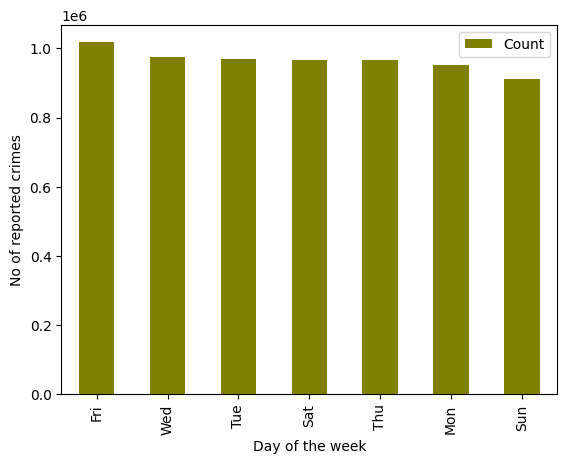

In [ ]:
cp.sort_values('Count',ascending=False).plot(kind='bar',color='Olive',x='Day_of_week',y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No of reported crimes')


## (05_01) RDDs setup

**How many police stations are there?**

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**